In [ ]:
#cleaning and loading of data
#plots
#Decision Trees
#Logistic Regression
#XGBoost (Extreme Gradient Boosting)
#results of model
#factor plots

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data = pd.read_csv('/content/drive/MyDrive/portfolio work/framingham.csv')

In [7]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [8]:
data.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0
4239,0,39,3.0,1,30.0,0.0,0,0,0,196.0,133.0,86.0,20.91,85.0,80.0,0


<Axes: >

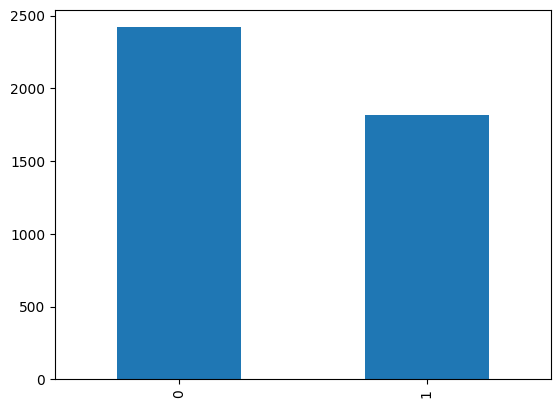

In [9]:
# create plots of each of the variables
# categorical data for male or female
data['male'].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

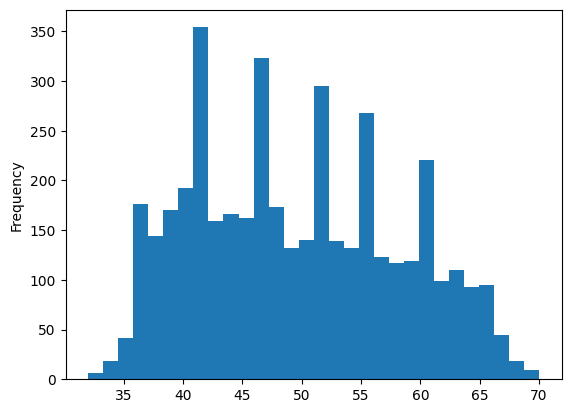

In [10]:
# continuous variable which denotes age
data['age'].plot(kind='hist', bins = 30)

<Axes: >

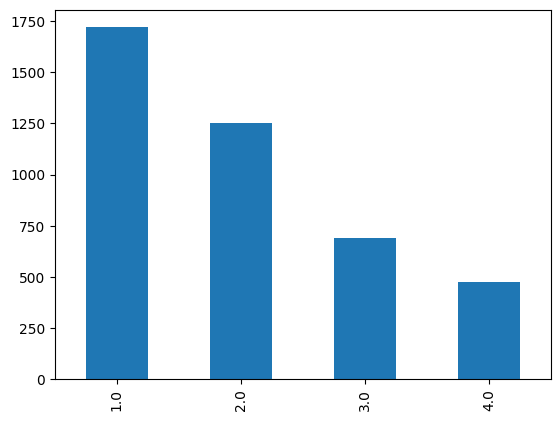

In [11]:
# Categorical that shows education received
data['education'].value_counts().plot(kind='bar')

<Axes: >

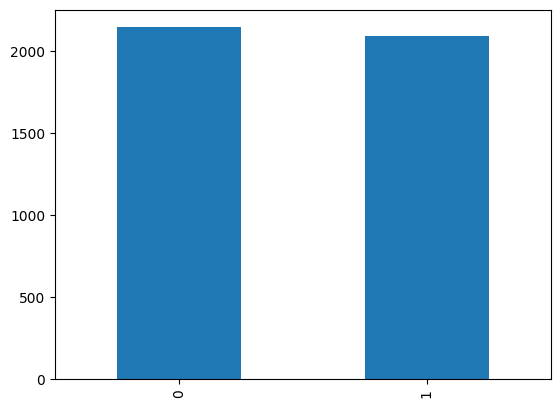

In [12]:
#
data['currentSmoker'].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

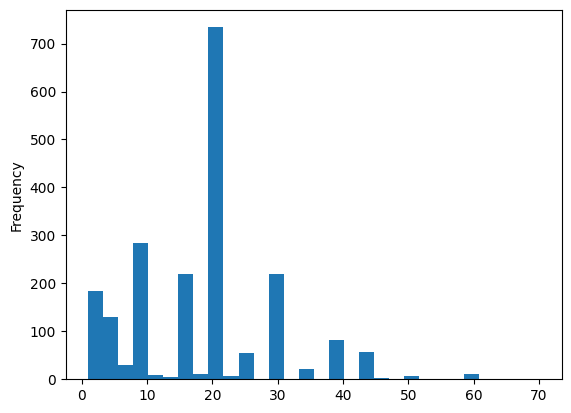

In [14]:
# number of cigaar
data['cigsPerDay'][data['cigsPerDay'] > 0].plot(kind='hist', bins = 30)

<Axes: >

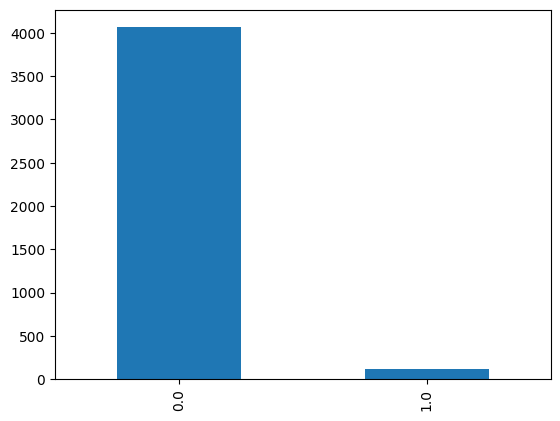

In [15]:
# binary on whether or not a patient is taking blood pressure med
data['BPMeds'].value_counts().plot(kind='bar')

<Axes: >

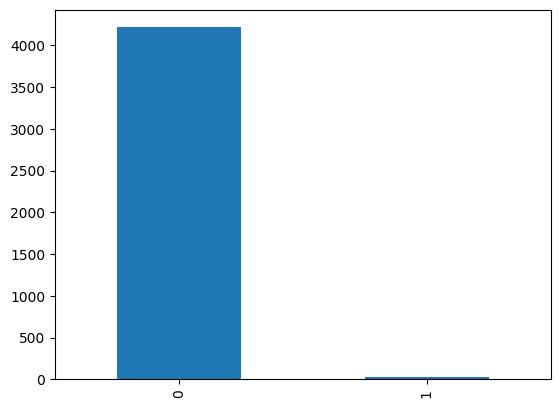

In [16]:
# has had a stroke or not binary
data['prevalentStroke'].value_counts().plot(kind='bar')

<Axes: >

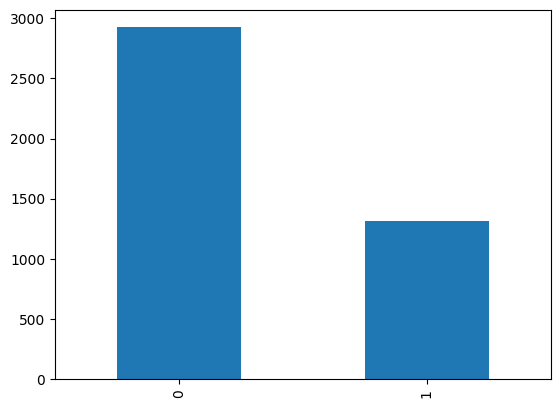

In [17]:
# hypertension prevalent binary
data['prevalentHyp'].value_counts().plot(kind='bar')

<Axes: >

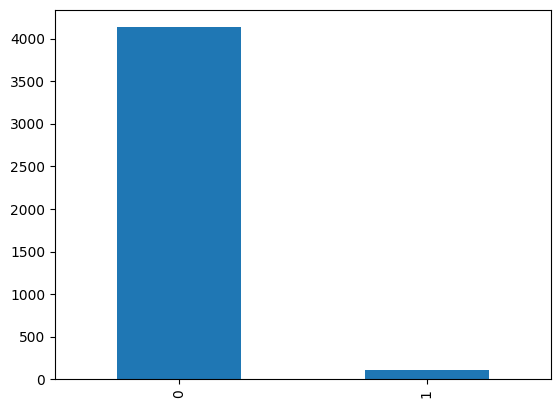

In [18]:
# diabetes binary
data['diabetes'].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

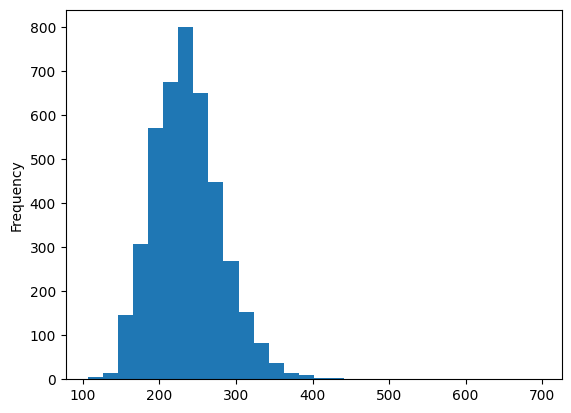

In [19]:
#
data['totChol'].plot(kind='hist', bins = 30)

<Axes: ylabel='Frequency'>

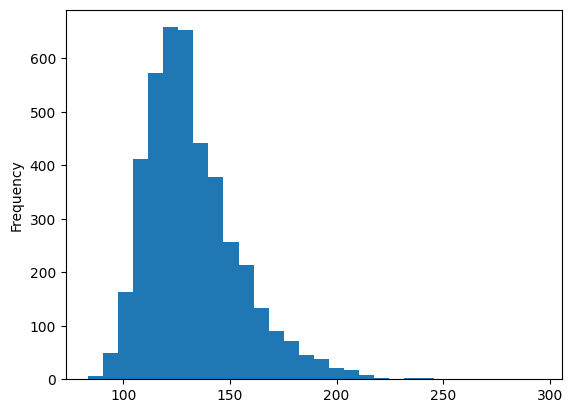

In [20]:
#systolic blood pressure
data['sysBP'].plot(kind='hist', bins = 30)

<Axes: ylabel='Frequency'>

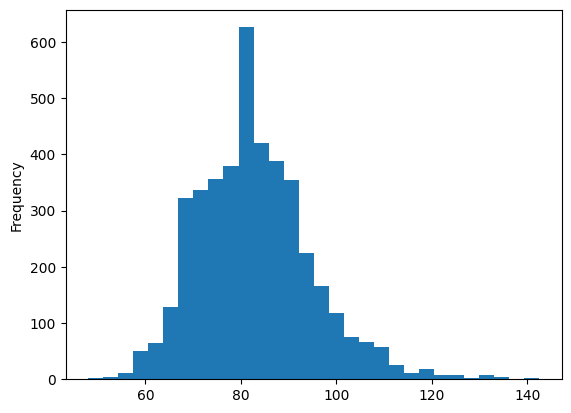

In [21]:
#diastolic blood pressure
data['diaBP'].plot(kind='hist', bins = 30)

<Axes: ylabel='Frequency'>

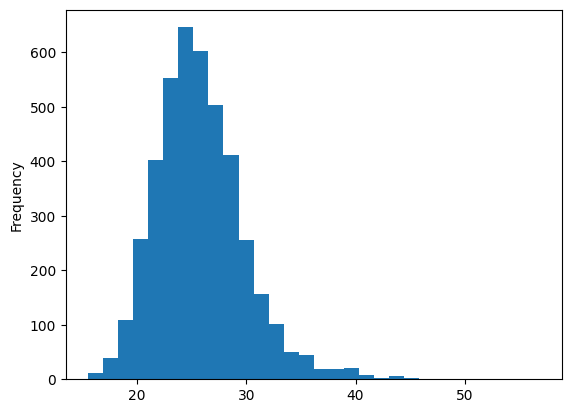

In [22]:
#
data['BMI'].plot(kind='hist', bins = 30)

<Axes: ylabel='Frequency'>

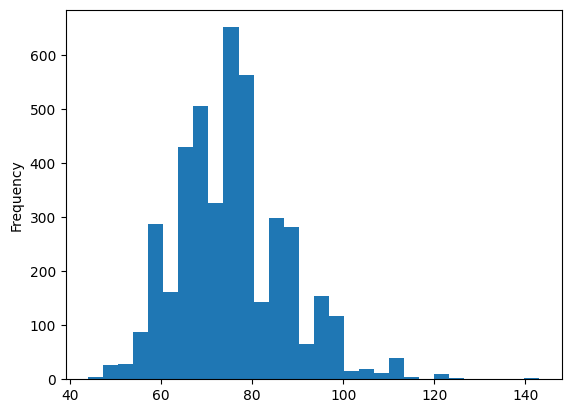

In [23]:
# the heart rate of the people on the
data['heartRate'].plot(kind='hist', bins = 30)

<Axes: ylabel='Frequency'>

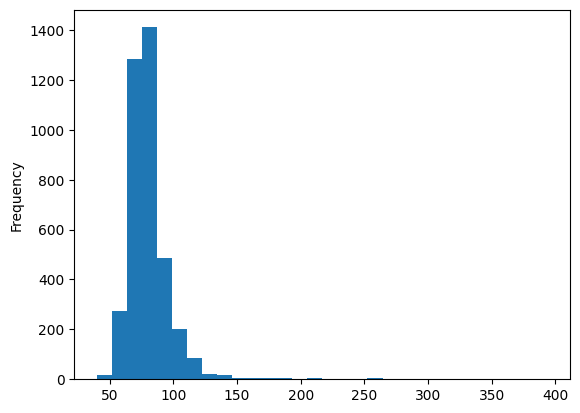

In [24]:
data['glucose'].plot(kind='hist', bins=30)

<Axes: >

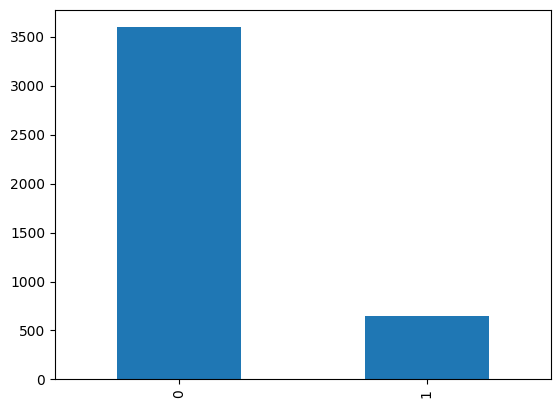

In [25]:
data['TenYearCHD'].value_counts().plot(kind='bar')

In [26]:
#check for NaN
data.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [27]:
#check for ordinal vs numerical
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [28]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

copy_data = data.copy()  # Make a copy to avoid modifying original data

# Impute missing values
imputer = IterativeImputer(random_state=0, max_iter=10, min_value = 0)
imputer.fit(copy_data)
copy_data[:] = imputer.transform(copy_data)

<ipython-input-28-bd859c351d8d>:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  copy_data[:] = imputer.transform(copy_data)


In [30]:
imputed_data = copy_data

In [33]:
# Encode the target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
imputed_data['TenYearCHD'] = le.fit_transform(imputed_data['TenYearCHD'])
dropped_data['TenYearCHD'] = le.fit_transform(dropped_data['TenYearCHD'])

<ipython-input-33-0dab4594fd08>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped_data['TenYearCHD'] = le.fit_transform(dropped_data['TenYearCHD'])


In [34]:

# create dataset with dropped any null values
dropped_data = data.dropna()

In [35]:
#create test and training set
from sklearn.model_selection import train_test_split

dropped_train, dropped_test = train_test_split(dropped_data, test_size=0.2)

In [36]:
#create test and training set for imputed dataset
from sklearn.model_selection import train_test_split

imputed_train, imputed_test = train_test_split(imputed_data, test_size=0.2)

In [37]:
#Decision Trees on normal data
# use tree.DecisionTreeClassifier()
# train the decision tree model
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(imputed_train.loc[:, imputed_train.columns != 'TenYearCHD'], imputed_train['TenYearCHD'])

In [39]:
#Decision Trees on dropped data
# drop all na values
data.dropna()
# use tree.DecisionTreeClassifier()
# train the decision tree model
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
clfd = DecisionTreeClassifier(random_state=0)
clfd = clf.fit(dropped_train.loc[:, dropped_train.columns != 'TenYearCHD'], dropped_train['TenYearCHD'])

In [41]:
from sklearn.metrics import accuracy_score
# test the decision tree model with null data dropped
y_pred = clfd.predict(dropped_test.loc[:, dropped_test.columns != 'TenYearCHD'])
print("Accuracy:", accuracy_score(dropped_test['TenYearCHD'], y_pred))

Accuracy: 0.7418032786885246


In [43]:
# test the decision tree model with null data imputed
y_pred = clf.predict(imputed_test.loc[:, imputed_test.columns != 'TenYearCHD'])
print("Accuracy:", accuracy_score(imputed_test['TenYearCHD'], y_pred))

Accuracy: 0.9209905660377359


In [45]:
#Logistic Regression
# use LogisticRegression(random_state=0).fit(X, y)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0).fit(imputed_train.loc[:, imputed_train.columns != 'TenYearCHD'], imputed_train['TenYearCHD'])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
#Logistic Regression for data with NA values dropped
# use LogisticRegression(random_state=0).fit(X, y)
from sklearn.linear_model import LogisticRegression
lrd = LogisticRegression(random_state=0).fit(dropped_train.loc[:, dropped_train.columns != 'TenYearCHD'], dropped_train['TenYearCHD'])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
y_pred = lr.predict(imputed_test.loc[:, imputed_test.columns != 'TenYearCHD'])
print("Accuracy:", accuracy_score(imputed_test['TenYearCHD'], y_pred))

Accuracy: 0.8561320754716981


In [49]:
y_pred = lrd.predict(dropped_test.loc[:, dropped_test.columns != 'TenYearCHD'])
print("Accuracy:", accuracy_score(dropped_test['TenYearCHD'], y_pred))

Accuracy: 0.837431693989071


In [50]:
#XGBoost (Extreme Gradient Boosting) for dropped data
#xgb.DMatrix(data, label=label)
import xgboost as xgb
xm = xgb.DMatrix(dropped_train.loc[:, dropped_train.columns != 'TenYearCHD'], dropped_train['TenYearCHD'], enable_categorical=True)

In [51]:
#XGBoost (Extreme Gradient Boosting) for imputed data
#xgb.DMatrix(data, label=label)
import xgboost as xgb
xmd = xgb.DMatrix(imputed_train.loc[:, imputed_train.columns != 'TenYearCHD'], imputed_train['TenYearCHD'], enable_categorical=True)

In [55]:
#dropped
params = {"objective": "multi:softprob", "tree_method": "hist", "num_class": 2}
n = 100

resultsd = xgb.cv(
   params, xmd,
   num_boost_round=n,
   nfold=5,
   metrics=["mlogloss", "auc", "merror"],
)

In [56]:
resultsd

,train-mlogloss-mean,train-mlogloss-std,train-auc-mean,train-auc-std,train-merror-mean,train-merror-std,test-mlogloss-mean,test-mlogloss-std,test-auc-mean,test-auc-std,test-merror-mean,test-merror-std
0,0.546367,0.001062,0.759774,0.007486,0.130675,0.001984,0.562149,0.003443,0.674457,0.006747,0.165977,0.010947
1,0.463988,0.002068,0.796619,0.012912,0.125147,0.002850,0.492756,0.004123,0.695873,0.007071,0.165386,0.011654
2,0.410665,0.001739,0.826454,0.006114,0.123526,0.002223,0.453198,0.005766,0.695259,0.013107,0.163027,0.008614
3,0.373852,0.001873,0.847784,0.006253,0.121020,0.001241,0.429975,0.006504,0.691710,0.012772,0.163321,0.009721
4,0.344621,0.002203,0.873463,0.007376,0.117556,0.001558,0.417434,0.005987,0.689548,0.011597,0.163026,0.009720
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.045842,0.002046,1.000000,0.000000,0.000811,0.000541,0.542779,0.021064,0.633790,0.024993,0.171875,0.002872
96,0.045136,0.002248,1.000000,0.000000,0.000737,0.000404,0.544337,0.020543,0.633445,0.024001,0.170696,0.002878
97,0.044292,0.001803,1.000000,0.000000,0.000590,0.000500,0.545465,0.019823,0.633633,0.024265,0.171580,0.003798
98,0.043669,0.001810,1.000000,0.000000,0.000516,0.000500,0.546543,0.019570,0.634174,0.024469,0.171580,0.004214


In [58]:
#imputed
params = {"objective": "multi:softprob", "tree_method": "hist", "num_class": 2}
n = 100

results = xgb.cv(
   params, xm,
   num_boost_round=n,
   nfold=5,
   metrics=["mlogloss", "auc", "merror"],
)

In [59]:
results

,train-mlogloss-mean,train-mlogloss-std,train-auc-mean,train-auc-std,train-merror-mean,train-merror-std,test-mlogloss-mean,test-mlogloss-std,test-auc-mean,test-auc-std,test-merror-mean,test-merror-std
0,0.539943,0.002105,0.775470,0.010973,0.121069,0.004084,0.557453,0.001164,0.668344,0.031607,0.161312,0.004095
1,0.454985,0.003380,0.805067,0.015096,0.114918,0.003448,0.486388,0.004300,0.686938,0.023289,0.154477,0.006533
2,0.400409,0.002681,0.831600,0.012017,0.113722,0.002459,0.445108,0.004561,0.699175,0.021185,0.154477,0.004394
3,0.362328,0.003689,0.852796,0.009980,0.111928,0.003374,0.420819,0.007543,0.699522,0.023849,0.152085,0.006035
4,0.335632,0.003439,0.869819,0.008375,0.109621,0.002450,0.407511,0.009036,0.699443,0.026915,0.151399,0.007259
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.039130,0.002831,1.000000,0.000000,0.000000,0.000000,0.534668,0.029043,0.642838,0.024724,0.166779,0.003453
96,0.038562,0.002758,1.000000,0.000000,0.000000,0.000000,0.535482,0.029245,0.643755,0.025421,0.167805,0.003603
97,0.037857,0.002672,1.000000,0.000000,0.000000,0.000000,0.537428,0.029285,0.644041,0.026208,0.168489,0.003954
98,0.037389,0.002501,1.000000,0.000000,0.000000,0.000000,0.539108,0.029421,0.643508,0.026612,0.169172,0.004165
